In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
dataset=pd.read_csv('input/Fintech dataset/appdata10.csv')

In [3]:
##EDA
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Data Cleaning
dataset.hour.str.slice(1,3).astype(int)

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [6]:
dataset['hour']=dataset.hour.str.slice(1,3).astype(int)

In [8]:
dataset2 = dataset.copy().drop(columns=['user','screen_list', 'enrolled_date','first_open','enrolled'])

In [9]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


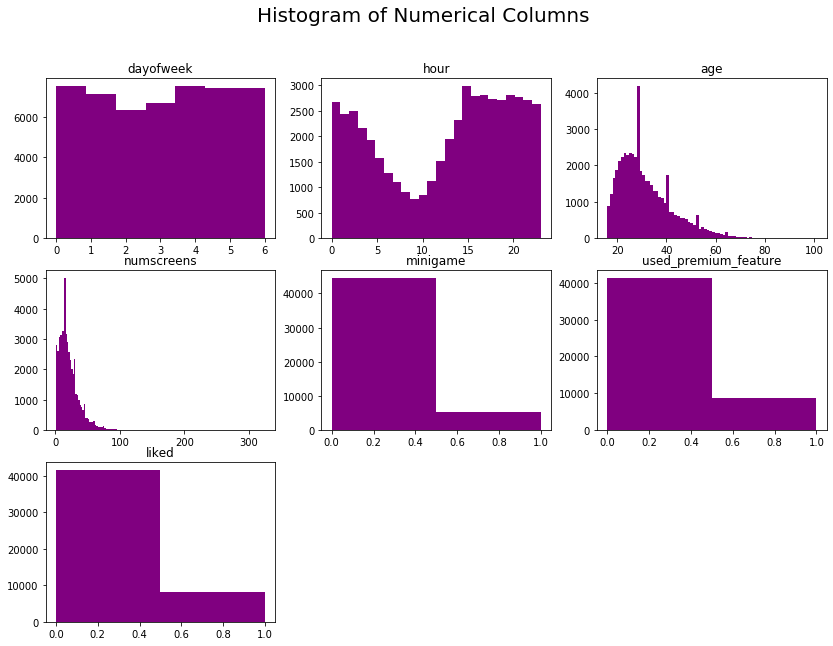

In [23]:
#plotting histogram
plt.figure(figsize=(14,10))
plt.suptitle('Histogram of Numerical Columns', fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i,)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    vals= np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1], bins = vals, color= 'purple')

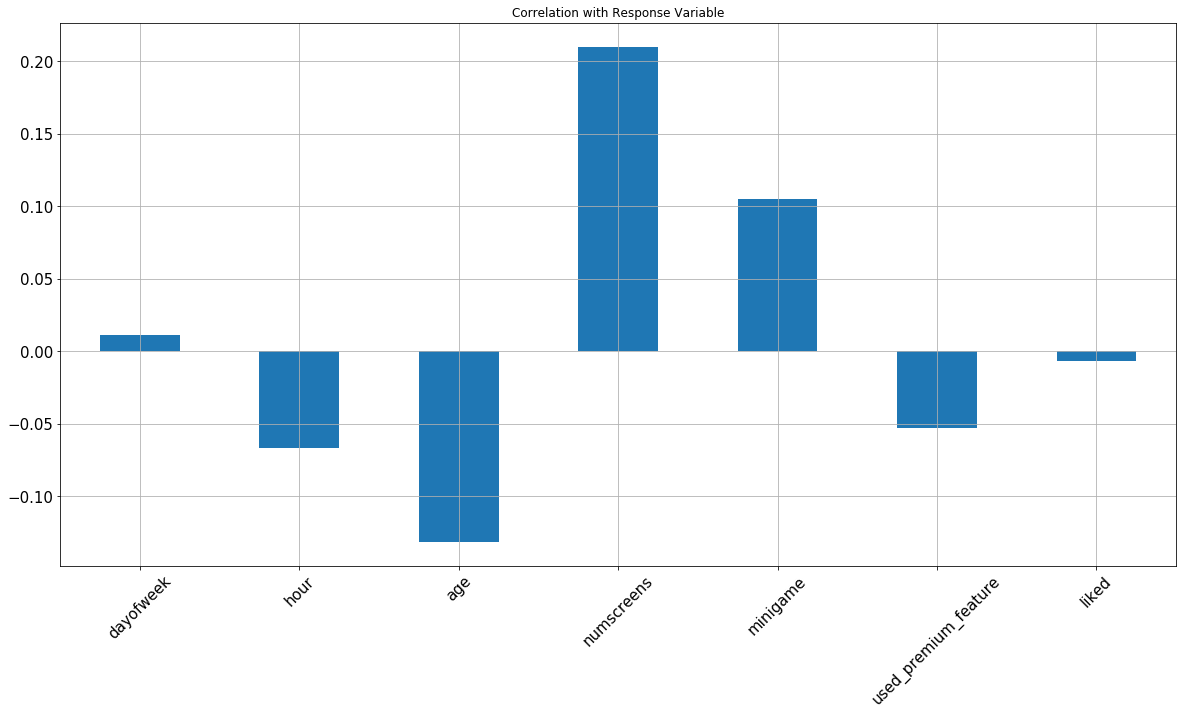

In [24]:
#Correlation with Response
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),title='Correlation with Response Variable',
                                             fontsize= 15, rot=45, grid= True)

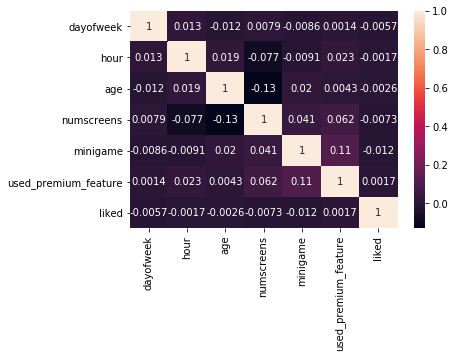

In [25]:
#Correlation Matrix
corr=dataset2.corr()
sns.heatmap(corr, annot=True)

In [26]:
#Feature Engineering
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [28]:
dataset["first_open"]=[parser.parse(row_data) for row_data in dataset["first_open"]]

In [29]:
dataset["enrolled_date"]=[parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [31]:
dataset.dtypes


user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [33]:
dataset['difference']= (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

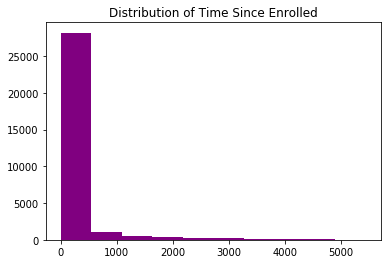

In [36]:
plt.hist(dataset['difference'].dropna(), color= 'purple')
plt.title('Distribution of Time Since Enrolled')
plt.show()

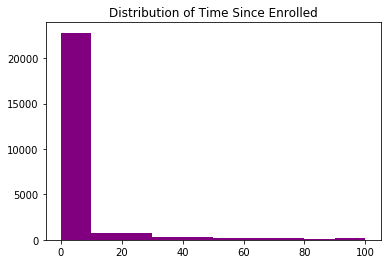

In [37]:
plt.hist(dataset['difference'].dropna(), color= 'purple', range= (0,100))
plt.title('Distribution of Time Since Enrolled')
plt.show()

In [38]:
dataset.loc[dataset.difference>48, 'enrolled']=0


In [40]:
dataset=dataset.drop(columns= ['difference','enrolled_date', 'first_open'])

In [44]:
#Formatting the screen_list field
top_screens=pd.read_csv('input/Fintech dataset/top_screens.csv').top_screens.values

In [46]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [47]:
top_screens.shape

(58,)

In [48]:
dataset["screen_list"]= dataset.screen_list.astype(str)+','

In [50]:
for sc in top_screens:
    dataset[sc]= dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"]=dataset.screen_list.str.replace(sc+",",")

In [51]:
dataset['other']= dataset.screen_list.str.count(",")

In [52]:
dataset=dataset.drop(columns=['screen_list'])

In [53]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [55]:
#Funnels
savings_screen = ["Saving1",
                 "Saving2",
                 "Saving2Amount",
                 "Saving4",
                 "Saving5",
                 "Saving6",
                 "Saving7",
                 "Saving8",
                 "Saving9",
                 "Saving10",]

In [57]:
dataset["SavingsCount"]= dataset[savings_screen].sum(axis=1)
dataset=dataset.drop(columns=savings_screen)

In [58]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0


In [60]:
cm_screen = ["Credit1",
            "Credit2",
            "Credit3",
            "Credit3Container",
            "Credit3Dashboard"]

In [63]:
dataset["CMCount"]= dataset[cm_screen].sum(axis=1)
dataset=dataset.drop(columns=cm_screen)

In [64]:
cc_screen = ["CC1",
            "CC1Category",
            "CC3"]

In [65]:
dataset["CCCount"]= dataset[cc_screen].sum(axis=1)
dataset=dataset.drop(columns=cc_screen)

In [66]:
loan_screen = ["Loan",
            "Loan2",
            "Loan3",
            "Loan4"]

In [67]:
dataset["LoansCount"]= dataset[loan_screen].sum(axis=1)
dataset=dataset.drop(columns=loan_screen)

In [68]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [72]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [73]:
dataset.to_csv("new_appdata10.csv",index= False)

In [128]:
dataset_up= pd.read_csv('input/Fintech dataset/new_appdata10.csv')

In [129]:
response=dataset_up['enrolled']

In [130]:
dataset_up= dataset.drop(columns='enrolled')

In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(dataset_up,response, test_size=0.2, random_state= 0)

In [151]:
train_identifier= x_train["user"]

In [152]:
x_train=x_train.drop(columns='user')

In [153]:
test_identifier= x_test["user"]
x_test=x_test.drop(columns='user')

In [154]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train2= pd.DataFrame(data = sc_x.fit_transform(x_train), index= x_train.index.values, columns= x_train.columns.values)
x_test2 =pd.DataFrame(data = sc_x.transform(x_test), index= x_test.index.values, columns= x_test.columns.values)

In [155]:
x_train =x_train2

In [156]:
x_test= x_test2

In [157]:
#Model Building
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
classifier.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
y_pred= classifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.68      0.63      0.66      3779
           1       0.79      0.82      0.80      6221

    accuracy                           0.75     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



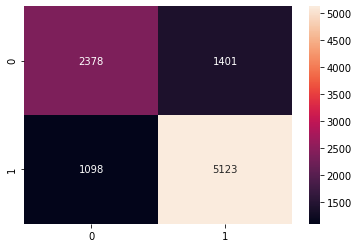

In [163]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot= True, fmt='g')

In [167]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= classifier, X=x_train, y=y_train, cv=10)
print("Logistic Accuracies %0.3f"% accuracies.mean())

Logistic Accuracies 0.757


In [171]:
final_result= pd.concat([y_test, test_identifier], axis=1).dropna()
final_result['predicted_results']=y_pred
final_result[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
